In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [3]:
type(housing)

sklearn.utils._bunch.Bunch

In [4]:
housing.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [5]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [6]:
df = pd.DataFrame(housing.data)

In [7]:
df['price'] = housing.target

In [8]:
df.head()

,0,1,2,3,4,5,6,7,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       20640 non-null  float64
 1   1       20640 non-null  float64
 2   2       20640 non-null  float64
 3   3       20640 non-null  float64
 4   4       20640 non-null  float64
 5   5       20640 non-null  float64
 6   6       20640 non-null  float64
 7   7       20640 non-null  float64
 8   price   20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [10]:
df.describe()

,0,1,2,3,4,5,6,7,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [11]:
x = df.drop('price',axis = 1)
y = df['price']

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=12)

In [13]:
x_train.shape[0]

14448

In [14]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [15]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [16]:
import pickle
with open('scalar.pkl','wb')as f:
  pickle.dump(scalar,f)

In [17]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [18]:
y_pred = reg.predict(x_test)

print(reg.coef_)
print(reg.intercept_)
print(reg.get_params())

[ 0.81884462  0.11960784 -0.26536928  0.31055045 -0.00264837 -0.04044386
 -0.9065125  -0.87588707]
2.065175163344405
{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}


In [19]:
y_pred

array([2.4569815 , 1.99760205, 2.29081182, ..., 2.24778256, 1.91939287,
       2.12754782])

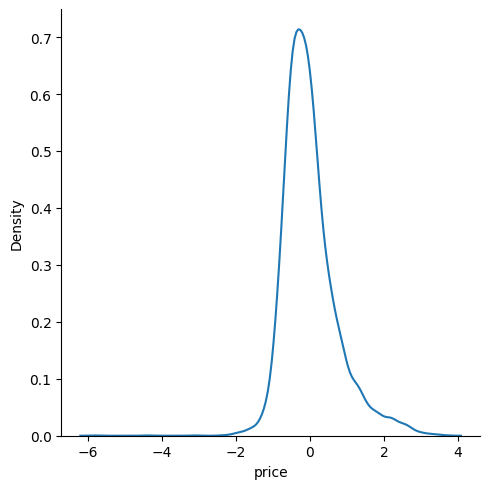

In [20]:
residual = y_test-y_pred
import seaborn as sns
sns.displot(residual,kind='kde')

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2e = r2_score(y_test, y_pred)
print(mse, mae, r2e)

0.5314494737169758 0.5344154915144822 0.6033040298158681


In [22]:
def adjusted_r2():
  val = 1-(1-r2e)*(len(y_train)-1)/(len(y_train)-x_train.shape[1]-1)
  return val

adjusted_r2()

0.6030842384340914

In [23]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators= 100, random_state= 42)
rf_reg.fit(x_train, y_train)
y_pred_rfr = rf_reg.predict(x_test)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
print(mse_rfr)

0.2536836518581442


In [24]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators=100, random_state= 42)
gbr.fit(x_train, y_train)
y_pred_gbr = gbr.predict(x_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
print(mse_gbr)

0.27799849807572385


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
nn = Sequential([
    Dense( 32, activation = 'relu', input_shape = (x_train.shape[1],)),
    Dense( 64, activation = 'relu'),
    Dense(1)
])
nn.compile( optimizer = 'adam', loss = 'mse')
nn.fit(x_train, y_train, epochs=20, batch_size=35, validation_split= 0.2)

y_pred_nn = nn.predict(x_test)
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(mse_nn)

Epoch 1/20
331/331 [==============================] - 2s 3ms/step - loss: 1.1336 - val_loss: 0.6224
Epoch 2/20
331/331 [==============================] - 1s 2ms/step - loss: 0.4711 - val_loss: 0.4558
Epoch 3/20
331/331 [==============================] - 1s 2ms/step - loss: 0.4003 - val_loss: 0.4074
Epoch 4/20
331/331 [==============================] - 1s 2ms/step - loss: 0.3795 - val_loss: 0.4150
Epoch 5/20
331/331 [==============================] - 1s 2ms/step - loss: 0.3639 - val_loss: 0.3726
Epoch 6/20
331/331 [==============================] - 1s 2ms/step - loss: 0.3543 - val_loss: 0.3829
Epoch 7/20
331/331 [==============================] - 1s 2ms/step - loss: 0.3458 - val_loss: 0.3925
Epoch 8/20
331/331 [==============================] - 1s 2ms/step - loss: 0.3309 - val_loss: 0.3545
Epoch 9/20
331/331 [==============================] - 1s 2ms/step - loss: 0.3270 - val_loss: 0.3726
Epoch 10/20
331/331 [==============================] - 1s 2ms/step - loss: 0.3198 - val_loss: 0.4157

In [27]:
rf_reg.predict(x_test[15,].reshape(1,-1))

array([1.47038])

## RandomForestRegressor is found to be the best performing model with mean_squared_error of 0.25 so it is choosen for dataset california_housing.

In [28]:
import pickle

In [35]:
with open('rf_reg.pkl', 'wb') as f:
  pickle.dump(rf_reg,f)

In [30]:
with open('rf_reg.pkl','rb') as p:
  model = pickle.load(p)

In [31]:
model.predict(x_test[15,].reshape(1,-1))

array([1.47038])

# The pickle file is working fine.

In [34]:
from google.colab import files
files.download('rf_reg.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
files.download('scalar.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>